# Best fit parabola

### Irving Gomez Mendez
### February 12, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

The general formula of a parabola is given by $y = Bx^2 + Cx + D$.

In [2]:
points = np.array([[-1,1/2],[1,-1],[2,-1/2],[3,2]])

points_x = points[:,0]
points_y = points[:,1]
points_x2 = points_x**2

n = points.shape[0]
yy = points_y
XX = np.vstack([points_x2, points_x, np.ones(n)]).T
p = XX.shape[1]

In [3]:
yy

array([ 0.5, -1. , -0.5,  2. ])

In [4]:
XX

array([[ 1., -1.,  1.],
       [ 1.,  1.,  1.],
       [ 4.,  2.,  1.],
       [ 9.,  3.,  1.]])

In [5]:
# We compute the coeff.
B, C, D = np.linalg.lstsq(XX, yy, rcond=None)[0]
params  = [B, C, D]

In [6]:
# Calculate the SSR
SSR = np.linalg.lstsq(XX, yy, rcond=None)[1]

In [7]:
# We get confidence interval
alpha = 0.05
x0 = np.linspace(-1.5, 3.5, 50)
X0 = np.vstack([x0**2, x0, np.ones(len(x0))]).T

aux_t_conf = np.sqrt(SSR/(n-p)*(np.diag(X0 @ np.linalg.inv(XX.T @ XX) @ X0.T)))
yy0_hat = X0 @ np.array(params)
upp_conf = yy0_hat+t.ppf(1-alpha/2,n-p)*aux_t_conf
low_conf = yy0_hat-t.ppf(1-alpha/2,n-p)*aux_t_conf

# We get prediction interval
aux_t_pred = np.sqrt(SSR/(n-p)*(1+np.diag(X0 @ np.linalg.inv(XX.T @ XX) @ X0.T)))
yy0_hat = X0 @ np.array(params)
upp_pred = yy0_hat+t.ppf(1-alpha/2,n-p)*aux_t_pred
low_pred = yy0_hat-t.ppf(1-alpha/2,n-p)*aux_t_pred

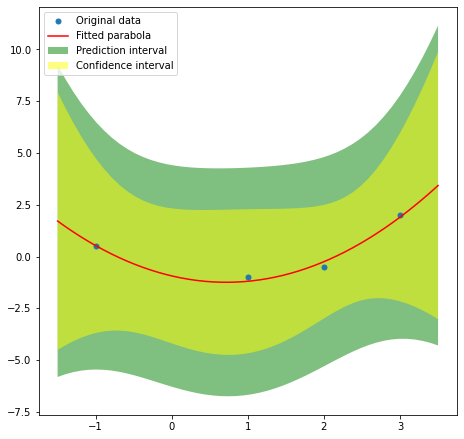

In [8]:
plt.figure(figsize=(7.5,7.5))
plt.plot(points_x, points_y, 'o', label='Original data', markersize=5)
plt.plot(x0, B*x0**2+C*x0+D, 'r', label='Fitted parabola')
plt.fill_between(x0, low_pred, upp_pred, facecolor='green', alpha=0.5, label='Prediction interval')
plt.fill_between(x0, low_conf, upp_conf, facecolor='yellow', alpha=0.5, label='Confidence interval')
plt.legend(loc='upper left')
#plt.savefig('parabola_regression.png')